In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import math

from scipy import stats
from scipy.stats import kurtosis, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [245]:
# loading  the data
path = "oil_exxon.xlsx"
data = pd.read_excel(path)
data.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


In [246]:
# changing the index to dates and ensuring the data type to be date as well
data.index = pd.to_datetime(data["date"])
data = data.drop(['date'], axis = 1)
data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [247]:
# checking the data types
data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [248]:
# Defining the new name
new_col_names = {'exon_price': 'exxon_price'}

# renaming the the column
data = data.rename(columns= new_col_names)
data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [249]:
# checking for missing values
display(data.isna().any())

# dropping any missing values
data = data.dropna()

# checking
display(data.isna().any())

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

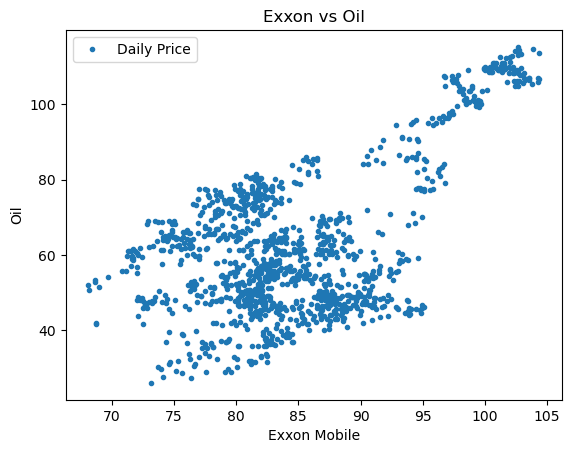

In [250]:
# Defining x and y
x = data['exxon_price']
y = data['oil_price']

# creating scatter plot
plt.plot(x, y, '.', label = 'Daily Price')

# formatting
plt.title('Exxon vs Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()
plt.show()

In [251]:
# Measuring the correlation
data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [252]:
# Summary
data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

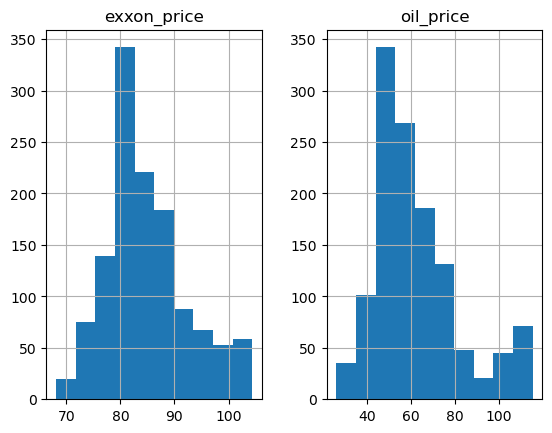

In [253]:
data.hist()

In [254]:
# Calculating the excess using fisher  method
exxon_kurtosis = kurtosis(data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(data['oil_price'], fisher = True)

# calculating the skewness
exxon_skew = skew(data['exxon_price'])
oil_skew = skew(data['oil_price'])

display("Exxon Kurtosis: {: .2}".format(exxon_kurtosis))
display("Oil Kurtosis: {: .2}".format(oil_kurtosis))

display("Exxon Skew: {: .2}".format(exxon_skew))
display("Oil Skew: {: .2}".format(oil_skew))

'Exxon Kurtosis:  0.088'

'Oil Kurtosis:  0.53'

'Exxon Skew:  0.66'

'Oil Skew:  1.0'

In [255]:
# Defining our input(X) and output variable(Y)
X = data[['oil_price']]
Y = data[['exxon_price']]

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)

In [256]:
# creating a linear regression model object
regression_model = LinearRegression()

# passing through the X_train and y_train data set
regression_model.fit(x_train, y_train)

LinearRegression()

In [257]:
# Taking the coeffiecient an the intercept
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print('coefficient = {}'.format(coefficient))
print('intercept = {}'.format(intercept))

coefficient = 0.22949641565120513
intercept = 70.54598937067966


In [258]:
# Predicting
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print('predicted value = {}'.format(predicted_value))

predicted value = 85.9979830364753


c:\Users\b0648618\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [259]:
# Getting multiple predictions
y_predict = regression_model.predict(x_test)

# looking at first 5 predictions
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [260]:
# defining our input 
X2 = sm.add_constant(X)

# ceraiting a OLS model
model = sm.OLS(y, X2)

# fitting the data
est = model.fit()

In [262]:
# making a confidence interval(95% by default)
est.conf_int()

,0,1
const,4.872172e-14,5.863684e-14
oil_price,1.000000e+00,1.000000e+00
